In [1]:
# import the stuff
from cetsp.core import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution, TripleMap, compute_tour_from_sequence

In [2]:
# create a simple instance

import random
circles = [Circle(Point(x*1.3, y*1.3), 1) for x in range(6) for y in range(6)]
instance = Instance(circles)

In [3]:
circles2 = [Circle(Point(1.1*x,1),1) for x in range(3)]
traj = compute_tour_from_sequence(circles2, True)
[traj[i] for i in range(len(traj))]

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-13


[Point(0.9999999265278243, 1),
 Point(1.099999999549415, 1),
 Point(1.2000000728317382, 1)]

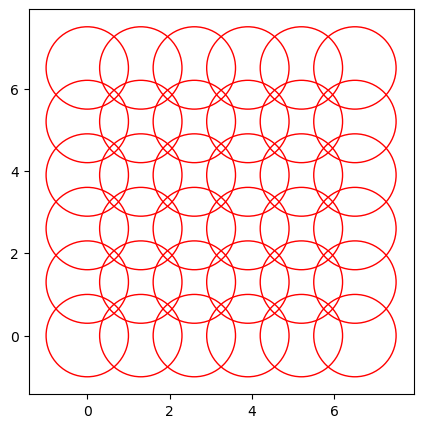

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, [])

In [5]:
# compute an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance)

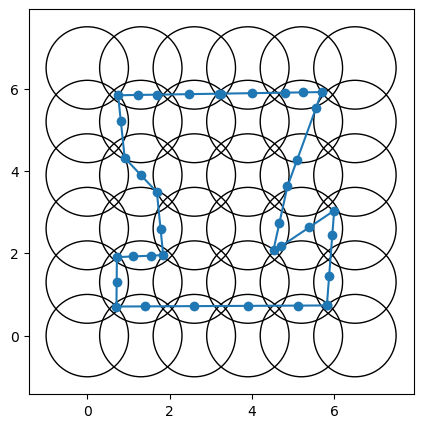

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, initial_solution)

Using ChFarthestCircle-Branching
Starting with root node of size 4
i	LB	|	UB


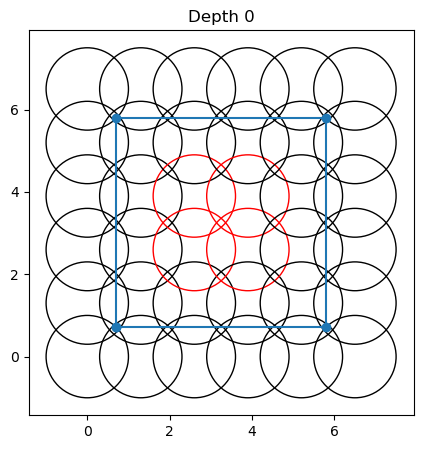

0	20.6206	|	24.667


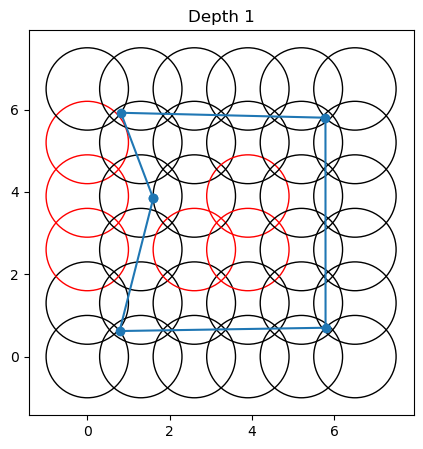

1	20.6206	|	24.667


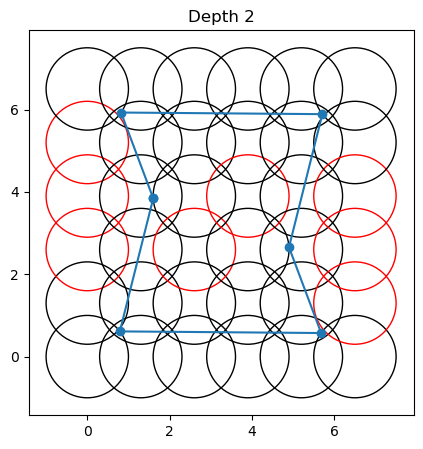

2	20.6206	|	24.667


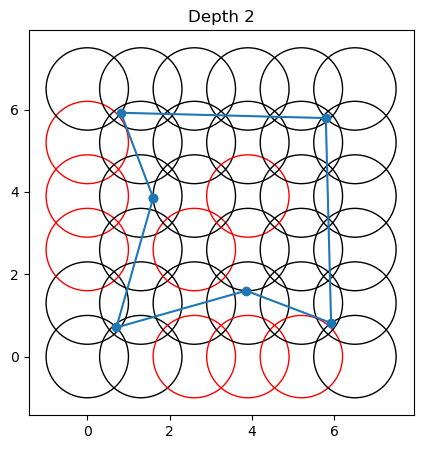

3	20.6206	|	24.667


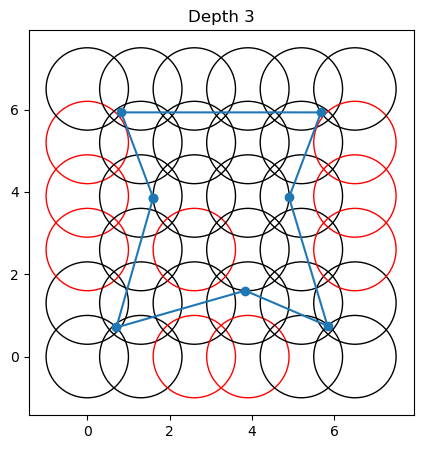

4	20.6206	|	24.667


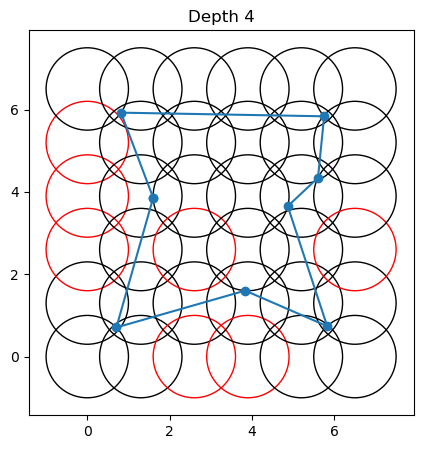

5	20.6206	|	24.667


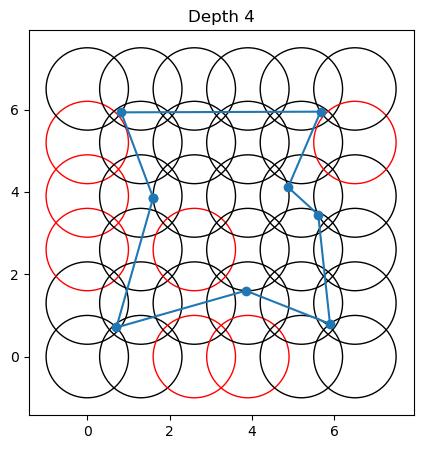

6	20.6206	|	24.667


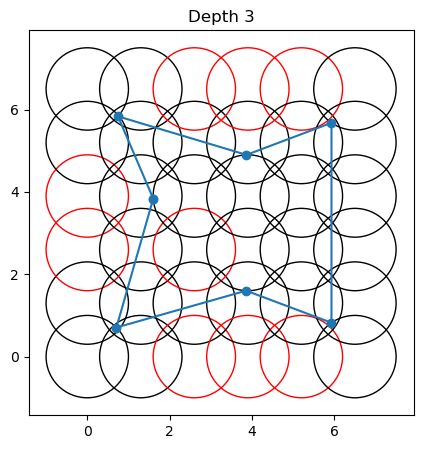

7	20.6206	|	24.667


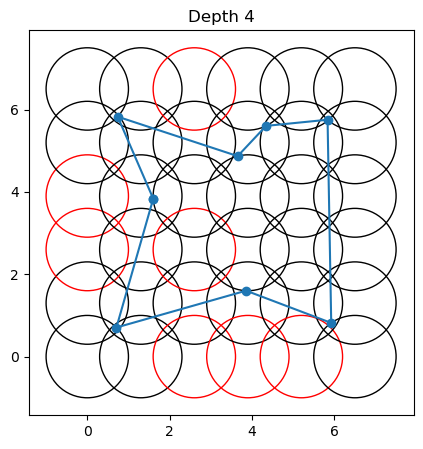

8	20.6206	|	24.667


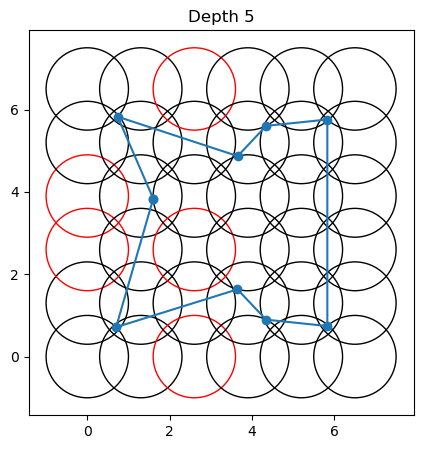

9	20.6206	|	24.667


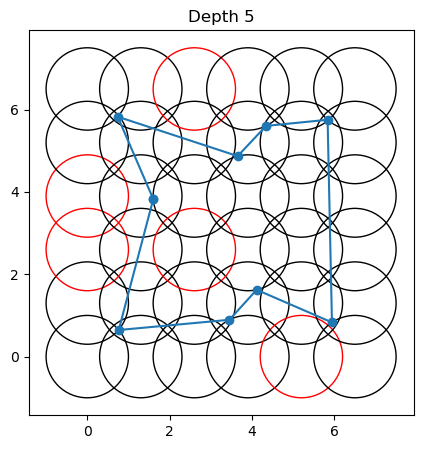

10	20.6206	|	24.667


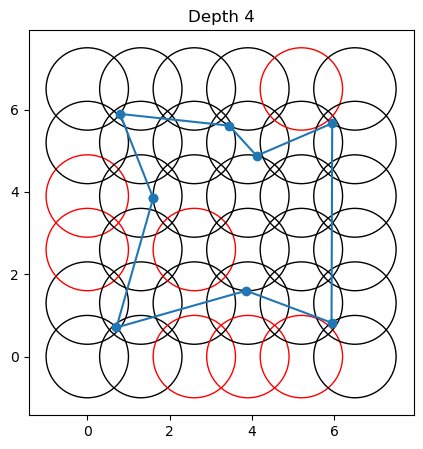

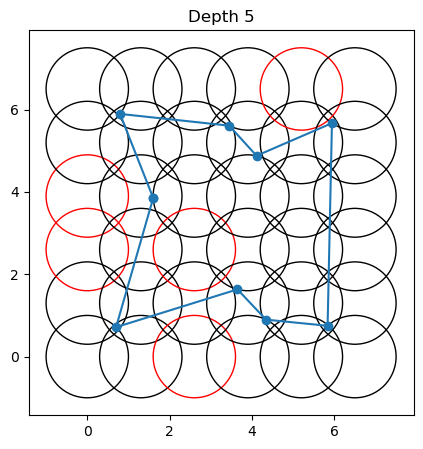

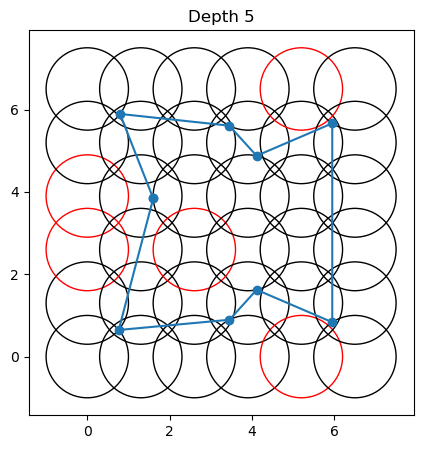

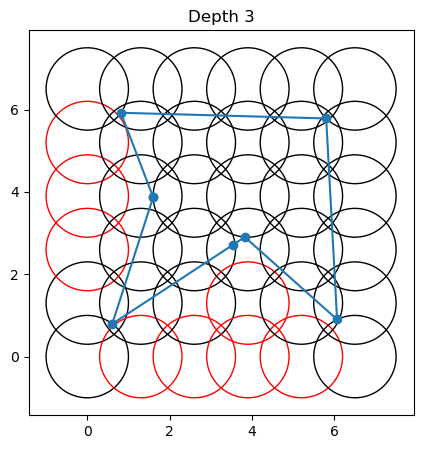

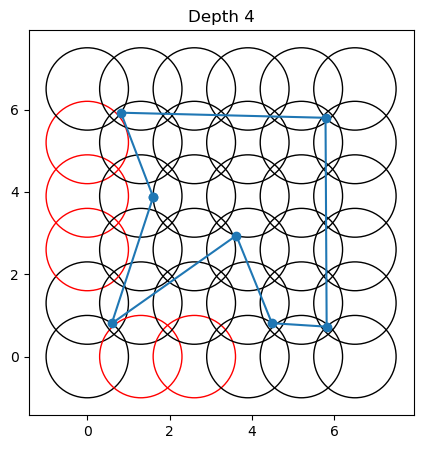

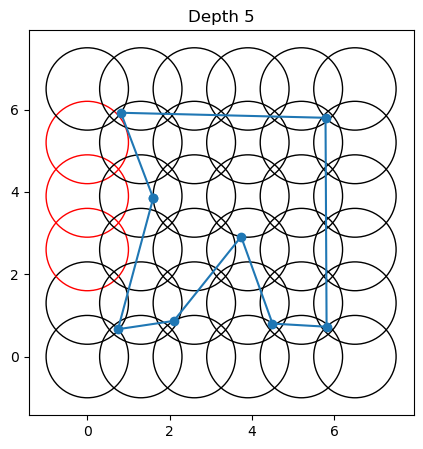

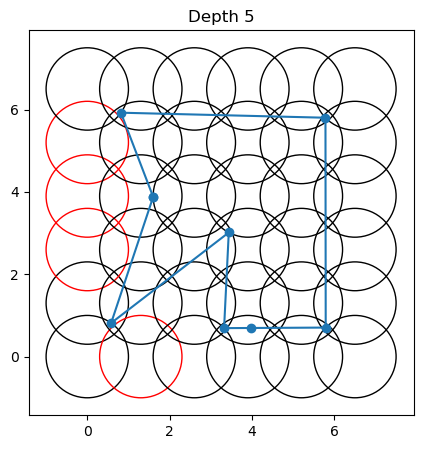

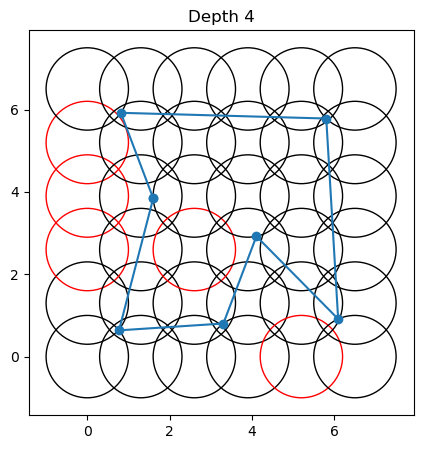

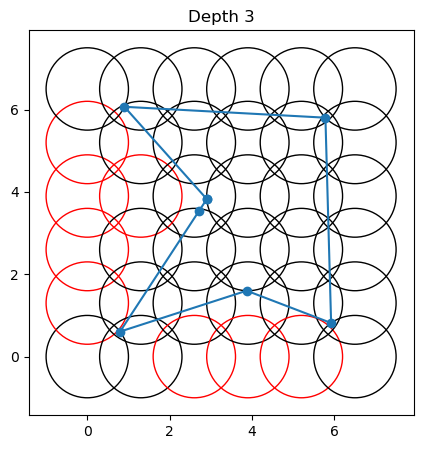

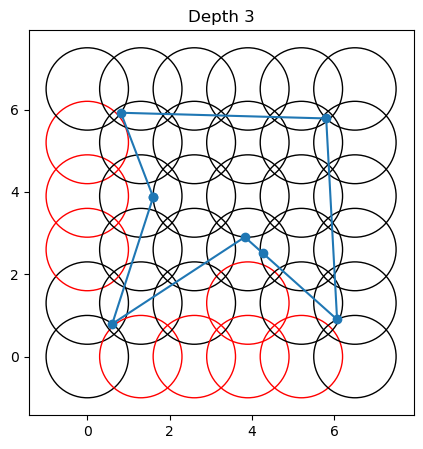

20	20.6206	|	24.667


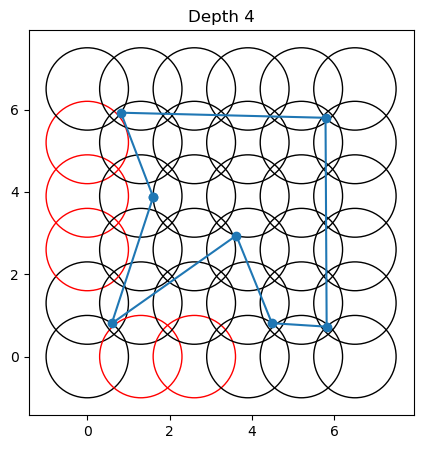

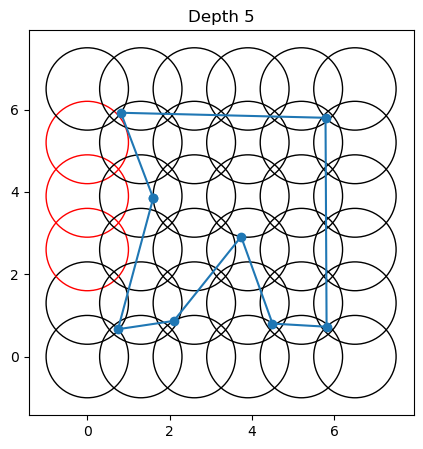

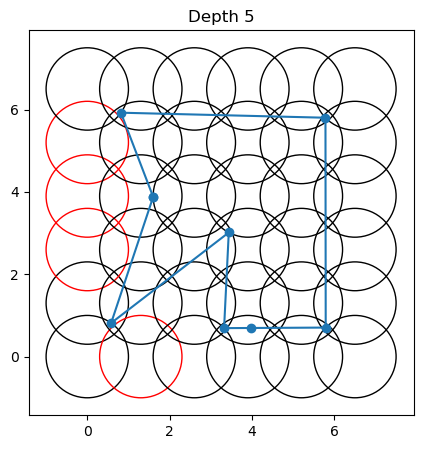

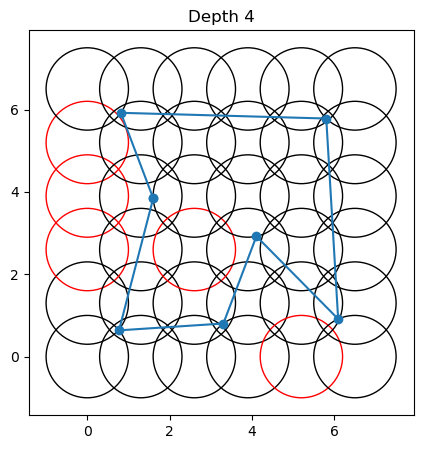

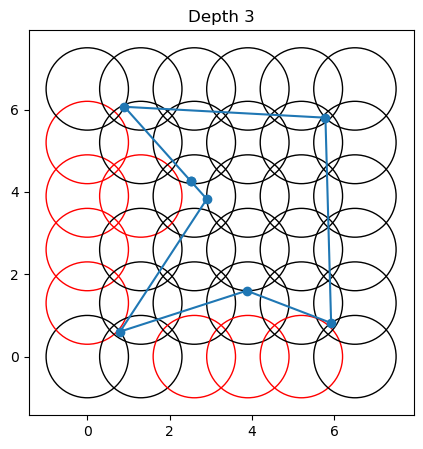

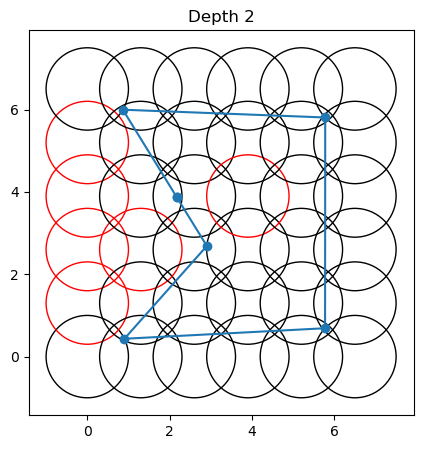

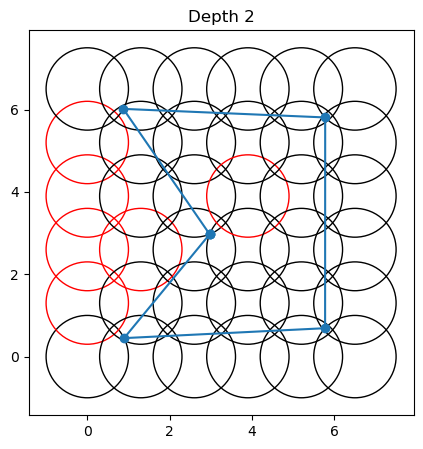

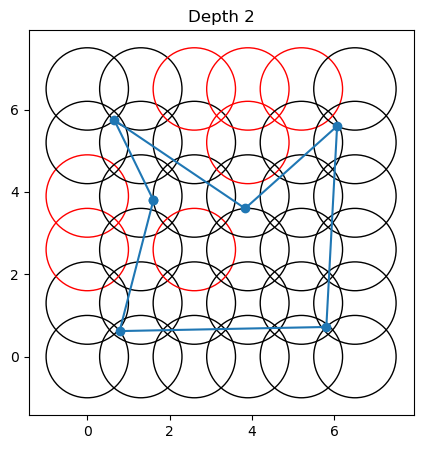

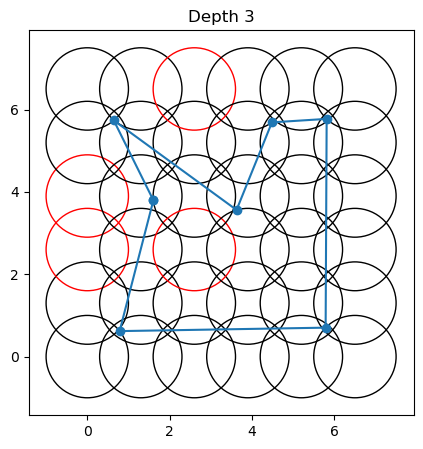

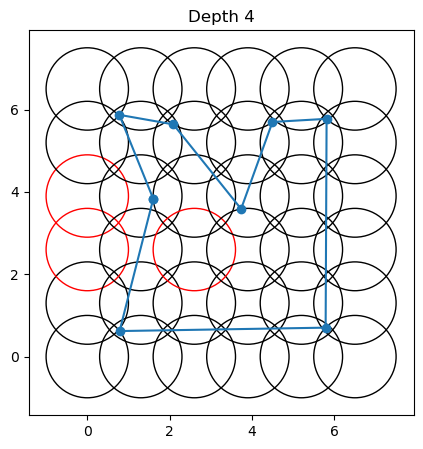

30	20.6206	|	24.667


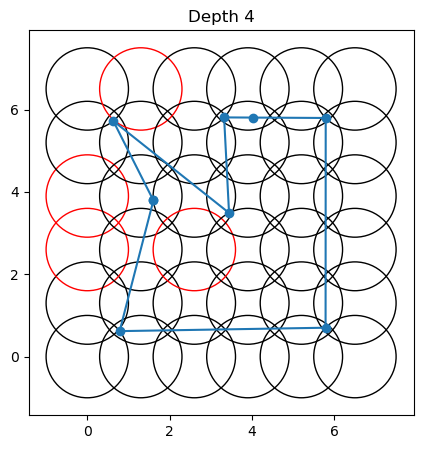

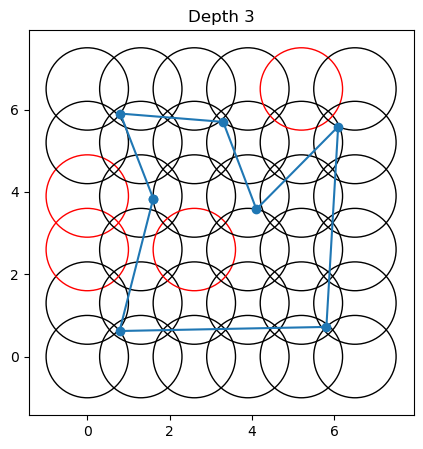

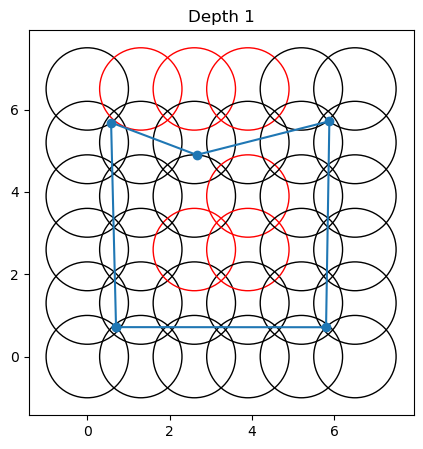

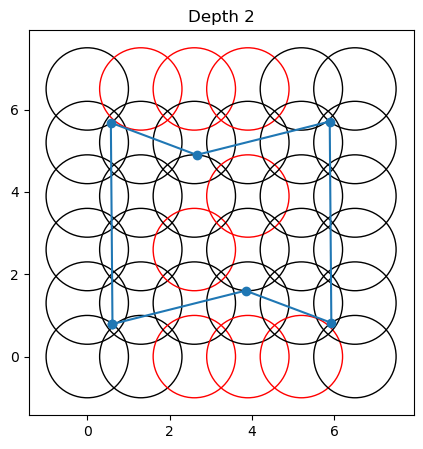

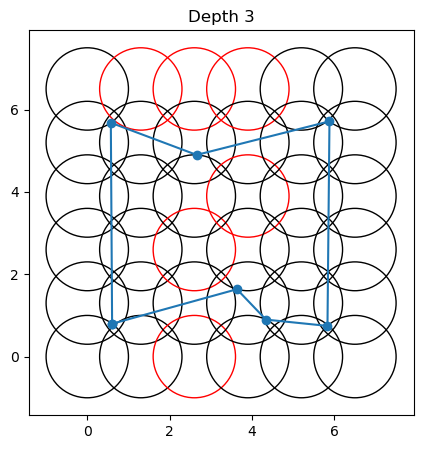

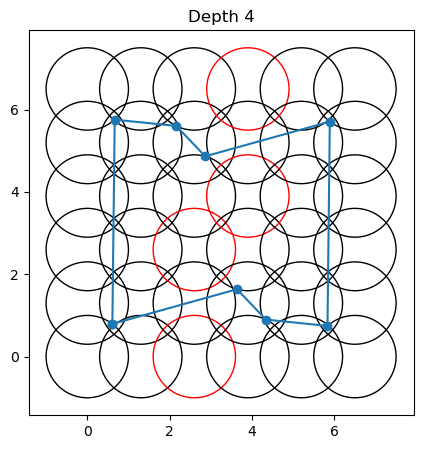

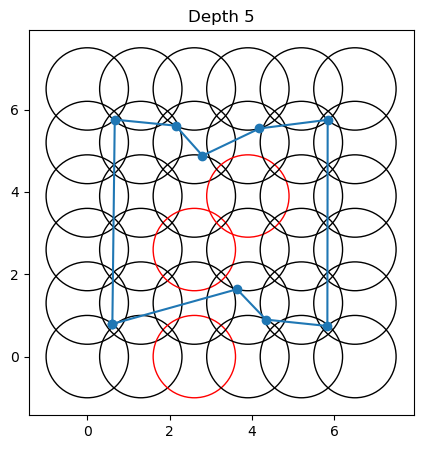

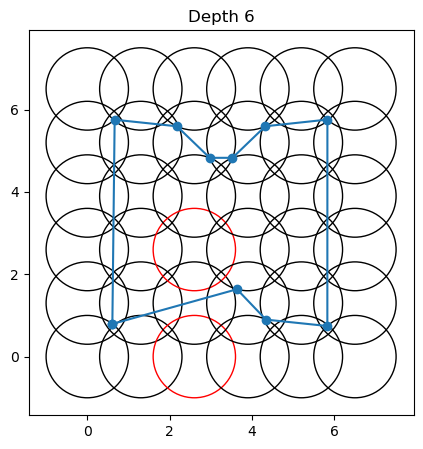

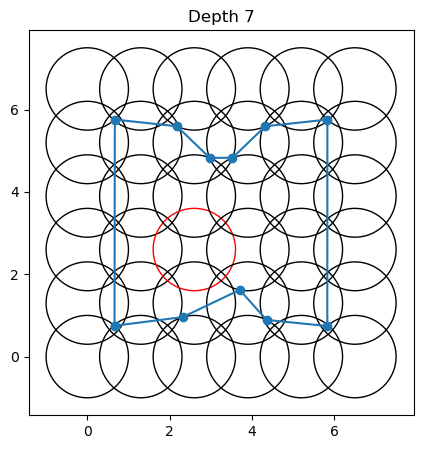

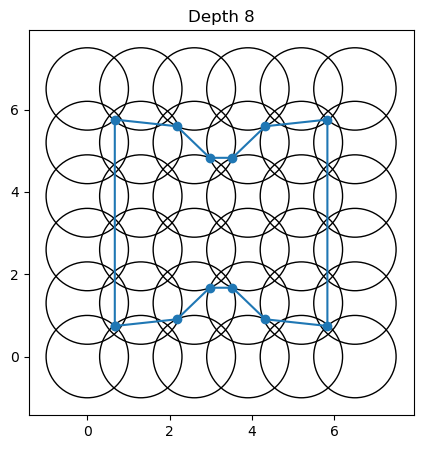

40	20.9238	|	21.6209


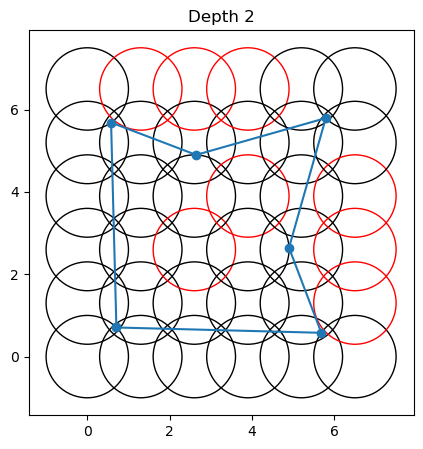

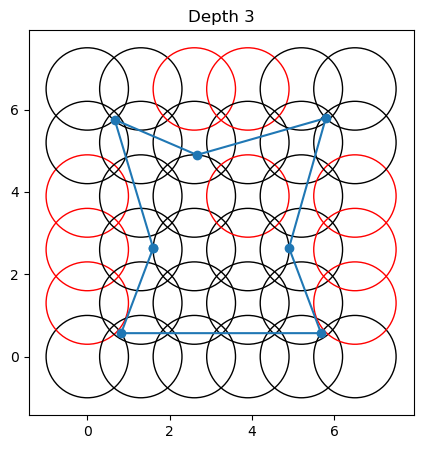

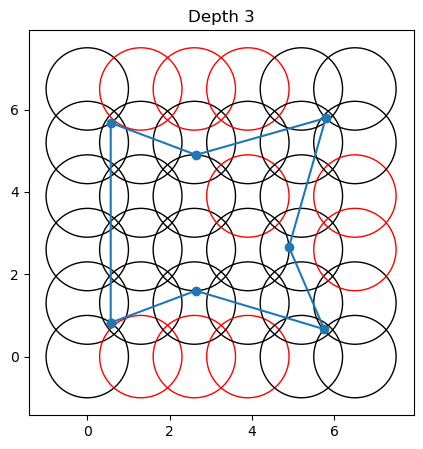

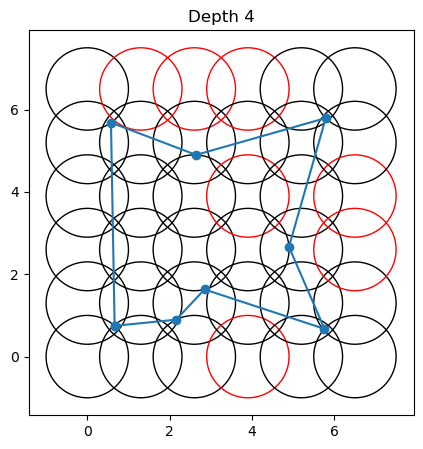

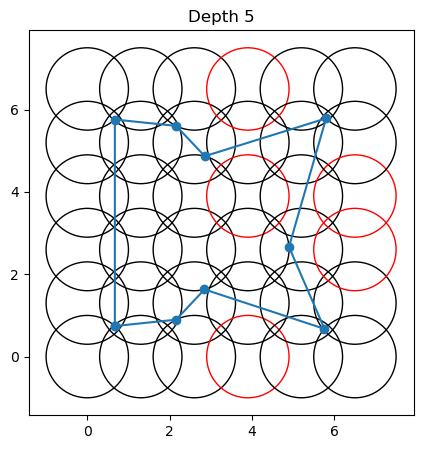

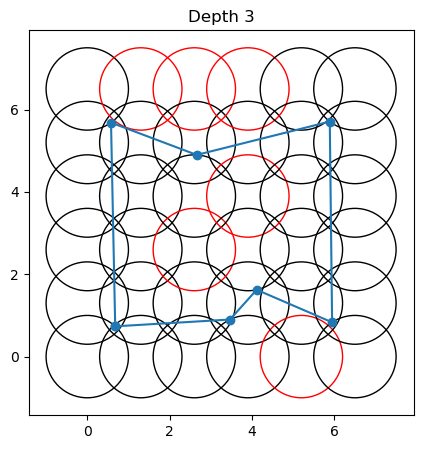

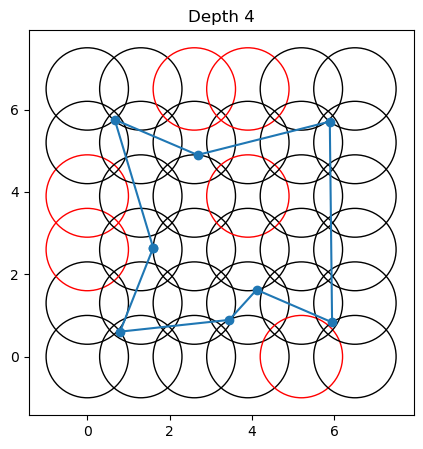

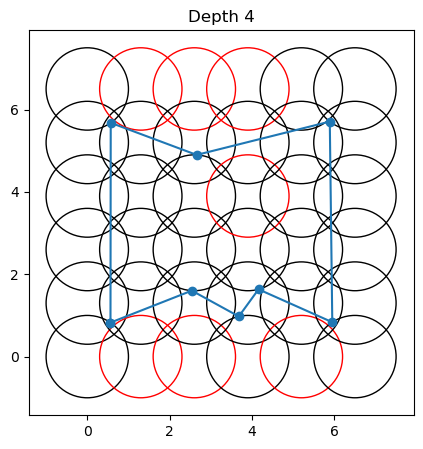

50	21.3153	|	21.6209


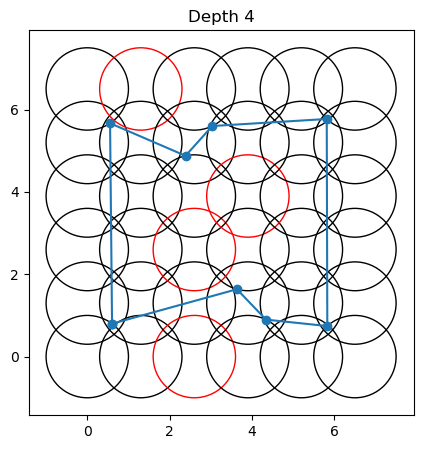

---------------
51	21.4517	|	21.6209


In [7]:
timelimit = 60
num_nodes_explored = 0
ub, lb = None, None
tm  = TripleMap(instance)
def count(event):
    global num_nodes_explored
    global ub
    global lb
    global tm
    global instance
    num_nodes_explored += 1
    ub = event.get_upper_bound()
    lb = event.get_lower_bound()
    seq = event.current_node.get_fixed_sequence()
    lb_ = sum(tm.get_cost(seq[i], seq[(i+1)%len(seq)], seq[(i+2)%len(seq)]) for i in range(len(seq)))

    plt.figure(figsize=(5, 5))
    plt.title(f"Depth {event.current_node.depth()}")
    plot_solution(plt.gca(), instance, event.get_relaxed_solution())
    plt.show()
    if not event.current_node.get_relaxed_solution().is_simple():
        print("not simple!")
    assert(lb_<=event.get_relaxed_solution().length())
opt_solution = branch_and_bound(instance, count, initial_solution, timelimit)

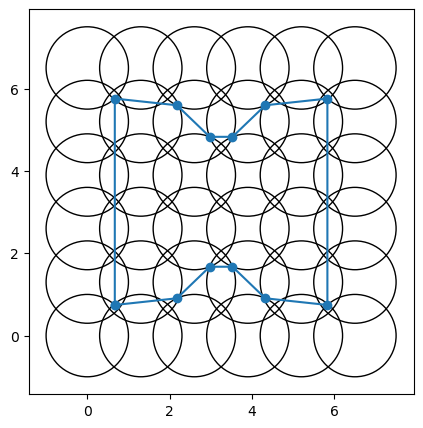

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, opt_solution)

In [9]:
num_nodes_explored, lb, ub

(50, 21.3153163423992, 21.62093620306886)

6.486266189891131
5.423641167965052 2.711820583982526
3.6050143994050243
3.5154332036804457 1.7577166018402228
2.672840072695643
2.1109610252983253 1.0554805180541187
3.139022201570835
2.206636118268298 1.1033180603238164
2.4678620716572315
1.9000003308449416 0.9500001654224708
6.750981709710117
5.850315343775331 2.9251576718876655
10.065706577347786
9.67178048553944 4.835890243376243
7.159724975644149
6.367921338529313 3.1839606686062387
5.4187737613813205
5.265668257655745 2.632834123719351


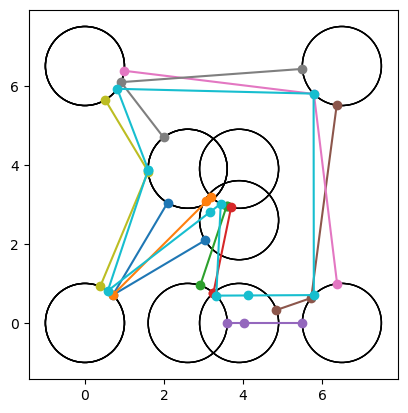

23.883095979651618 21.15617863721265


In [10]:
plt.figure()
indices = [15, 0, 20, 21, 12, 18, 30, 35, 5]
sol_traj = compute_tour_from_sequence([instance[i] for i in indices], False)
lb = sol_traj.length()
lb_ = 0
for i in range(len(indices)):
    u = indices[i]
    v = indices[(i+1)%len(indices)]
    w = indices[(i+2)%len(indices)]
    traj = compute_tour_from_sequence([instance[u], instance[v], instance[w]], True)
    print(sol_traj[i].dist(sol_traj[i+1])+sol_traj[i+1].dist(sol_traj[(i+2)%len(indices)]))
    print(traj.length(), tm.get_cost(u,v,w))
    plot_solution(plt.gca(), Instance([instance[u], instance[v], instance[w]]), traj)
    lb_ += tm.get_cost(u,v,w)
traj = compute_tour_from_sequence([instance[i] for i in indices], False)
plot_solution(plt.gca(), Instance([instance[u], instance[v], instance[w]]), sol_traj)
plt.show()
print(lb, lb_)